<pre style='font-size : 25px; text-align : center '><b>ASSIGNMENT 1</b></pre>
<pre style='font-size : 20px;'><b>PREDICTING HOUSING PRICES (EASY MODE)</b></pre>
<pre style='font-size : 15px'>Today you will have a chance to assimilate and measure the knowledge gained from the first lesson by working with the housing prices data. Firstly you will load and visualize the data. Then you will make your first model which is named <i>linear regression</i> to predict the prices of the houses. The data we will work with is a boston dataset of housing prices that is quite popular in machine learning community. The data is served as a dictionary with 5 columns :'data', 'target', 'feature_names', 'DESCR', 'filename'. We will use only 'data', 'feature_names' and 'target' columns. 'data' - features that our classifier we will learn; 'target' - the normilized prices of the houses, the actual answers we will try to predict and 'feature_names' - names of our features (we will use it just for convinience). As it's your first machine learning assignment, you will build the model depending on only two features : RM (average number of rooms for dwelling) and DIS (weighted distances to five Boston employment centres); we also won't use any regularization and only accuracy and loss as main metrics. In the later assignments you will have a chance to master your skills by using all the accessible features along with regularization. With all that said let's get started.
 
<i>Note : that's a test version of a notebook</i>

<pre style='font-size : 20px'><b>PART 1</b></pre>
<pre style='font-size : 18px'><b>Loading and processing the data</b></pre>
<pre style='font-size : 15px;'>First let's import necessary packages. </pre>

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np

<pre style='font-size : 15px'>We will use the boston data that is accessible via datasets package in scikit-learn</pre>

In [2]:
boston_data = datasets.load_boston()

<pre style='font-size : 15px'>Firstly let's read the description of the data in order to understand the features
we will work with</pre>

In [3]:
boston_data['DESCR'].split('\n')

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

<pre style='font-size : 15px'>Having loaded the data it's obvious that the dtype of it is dict.
We will cast it to pandas.DataFrame in order to easily visualize it </pre>

In [4]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:
columns_to_use = ['data','target','feature_names']

In [7]:
boston_data = dict([(i,boston_data[i]) for i in columns_to_use])

In [8]:
boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [9]:
len(boston_data['data'][0])

13

In [10]:
len(boston_data['data'])

506

In [11]:
df = pd.DataFrame(columns=boston_data['feature_names'], data=boston_data['data'])

In [12]:
df['target'] = boston_data['target']

In [13]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<pre style='font-size : 15px'>Having casted our dictionary to dataframe we can perform basic statistics in order to understand the data using df.describe function. We will also save our dataframe in order not to repeat the same steps of processing in other assignments.</pre>

In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
df.to_csv('../files/boston_data.csv',index=False)

<pre style='font-size : 15px'>As in this assignment we will use only two features, let's create a slice of dataframe,
where only those two will be accessible</pre>

In [15]:
df_slice = df.copy()[['RM','DIS','target']]

In [16]:
df_slice.head()

,RM,DIS,target
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2


<pre style='font-size : 15px'>We can see the correlation between our featurues and target by using a function .corr on our dataset</pre>

In [17]:
df_slice.corr()

,RM,DIS,target
RM,1.000000,0.205246,0.695360
DIS,0.205246,1.000000,0.249929
target,0.695360,0.249929,1.000000


<pre style='font-size : 15px'>Obviously, the correlation between RM (number of rooms) and our target is much higher than between DIS (distance to center) and the target. But for now we will put up with it and use both variables for regression.                                                                                                             </pre>

<pre style='font-size : 20px'><b>PART 2</b></pre>
<pre style='font-size : 18px'><b>Visualizing the data</b></pre>

In [18]:
%matplotlib notebook

In [19]:
#Note : you can easily see the documentation of any function by writing ? character before calling it
#uncomment the expression below to see the docs of plot function
#?df_slice.plot

<IPython.core.display.Javascript object>


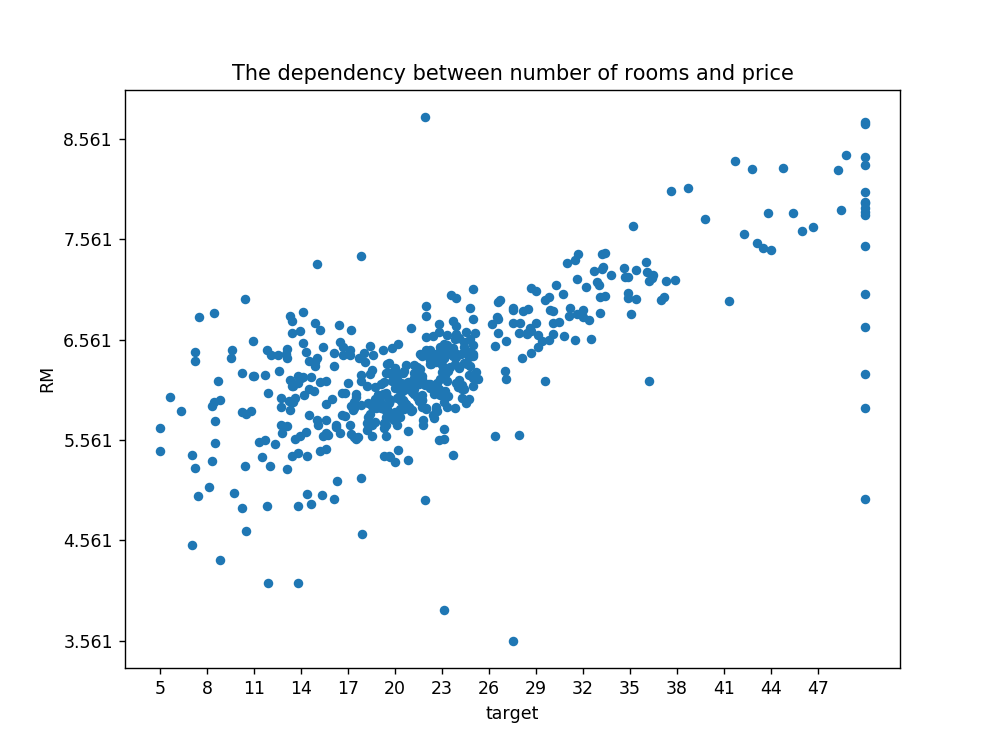

In [20]:
df_slice.plot(x='target', y='RM',kind='scatter', figsize=(8,6),title='The dependency between number of rooms and price',
             xticks=np.arange(min(df_slice['target']),max(df_slice['target']),3),
             yticks=np.arange(min(df_slice['RM']),max(df_slice['RM']),1));

<IPython.core.display.Javascript object>


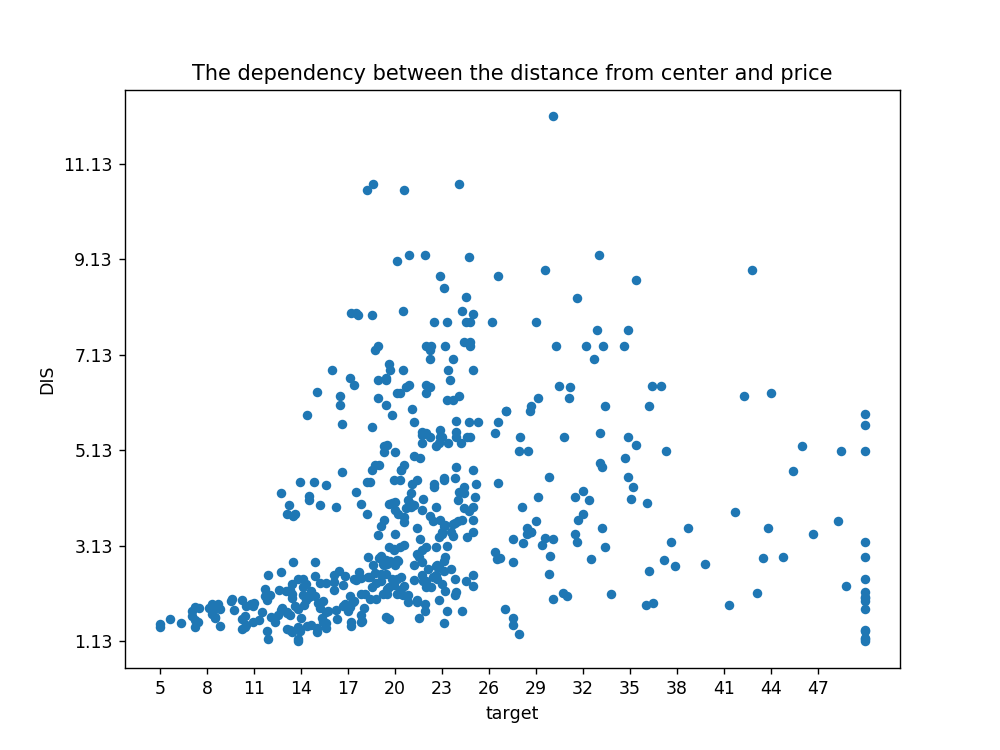

In [21]:
df_slice.plot(x='target', y='DIS',kind='scatter', figsize=(8,6),title='The dependency between the distance from center and price',
              xticks=np.arange(min(df_slice['target']),max(df_slice['target']),3),
             yticks=np.arange(min(df_slice['DIS']),max(df_slice['DIS']),2));

<IPython.core.display.Javascript object>


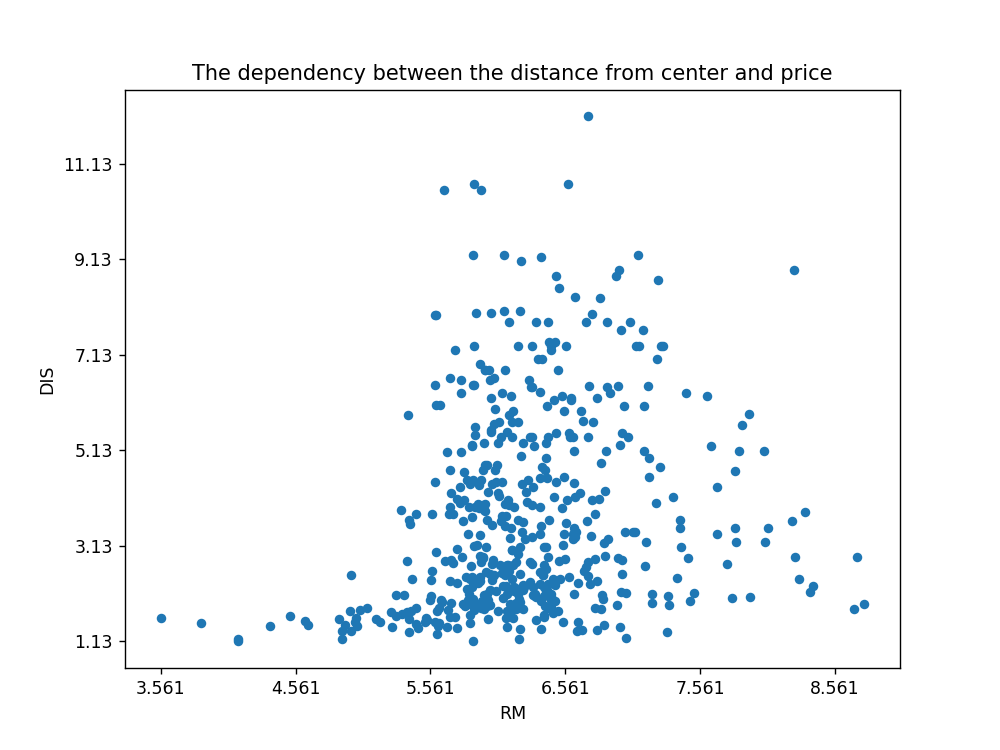

In [62]:
df_slice.plot(x='RM', y='DIS',kind='scatter', figsize=(8,6),title='The dependency between the distance from center and price',
             xticks=np.arange(min(df_slice['RM']),max(df_slice['RM']),1),
             yticks=np.arange(min(df_slice['DIS']),max(df_slice['DIS']),2));

<pre style='font-size : 15px'>Seems that it's pretty difficult to visualize the dependency of price using only one feature, 
instead let's visualize the relationship between price , number of rooms and distance from center using a 3d plot</pre>

In [22]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


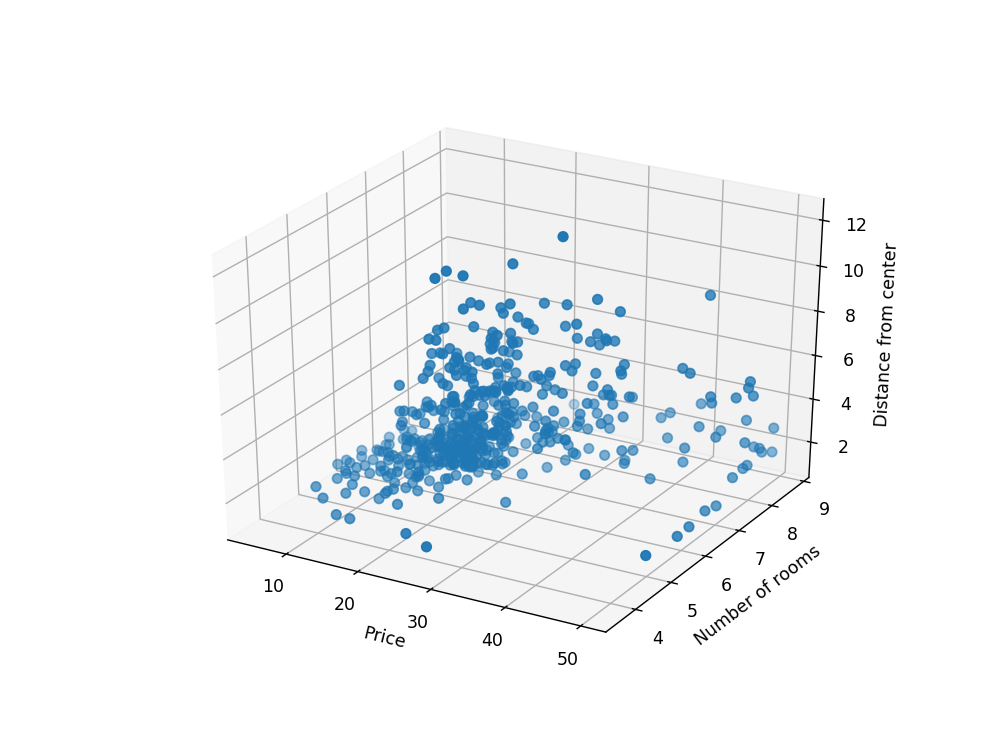

In [23]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
ax.scatter( df_slice['target'].values,df_slice['RM'].values ,df_slice['DIS'].values, zdir='z', s=30);
ax.set_ylabel('Number of rooms');
ax.set_zlabel('Distance from center');
ax.set_xlabel('Price');

<pre style='font-size : 15px'>From the visualization of a 3d plot it's obvious that despite the fact that most prices have some correlation with the number of rooms along with the distance to center, the relationship is much more complex (explaining why we have 13 features,instead of 2). But we'll see what we can do with it using a simple linear regression.
                                                                                          .</pre>

<pre style='font-size : 20px'><b>PART 3</b></pre>
<pre style='font-size : 18px'><b>Building, training and evaluating the model</b></pre>
<pre style='font-size : 15px;'>First of all we need to make two datasets, one - for training and another one for evaluation. For this stuff we will randomly divide our data. Recall from the first lesson that a recommended split factor for the data is 25% to the test set and 75% to the train one. </pre>

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#we will set a random seed for the same results
seed = 5

In [26]:
train_set, test_set = train_test_split(df_slice,test_size=0.25, random_state=seed)

In [27]:
len(train_set)

379

In [28]:
len(test_set)

127

In [29]:
X_train, y_train, X_test, y_test = train_set[['RM','DIS']], train_set['target'], test_set[['RM','DIS']], test_set['target']

<pre style='font-size : 15px'>Having split the data let's define our classifier.</pre>

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [120]:
clf = LinearRegression()

<pre style='font-size : 15px'>Now, when we defined the classifier, let's fit it with our train data</pre>

In [121]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<pre style='font-size : 15px'>Congratulations! You trained your first machine learning model. What can you do with it now? One option is to calculate the accuracy of it on train set and test set and that's what we will do next.</pre>

In [122]:
y_predicted_train = clf.predict(X_train)

In [123]:
print("Mean squared error on train data : {0}".format(mean_squared_error(y_predicted_train,y_train)))

Mean squared error on train data : 44.040321631093846


In [124]:
y_predicted_test = clf.predict(X_test)

In [118]:
print("Mean squared error on test data : {0}".format(mean_squared_error(y_predicted_test,y_test)))

Mean squared error on test data : 37.847285714465684


<pre style='font-size : 15px'>We got 44 mse score on train and 38 on test set, that's not bad for our benchmark model, but I'm sure that we can do better. Next time we will try  to train our classfier on all the features and compare the results. We will also look on some other kinds of regression models and see if they outperfom our benchmark one.</pre>